In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [6]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

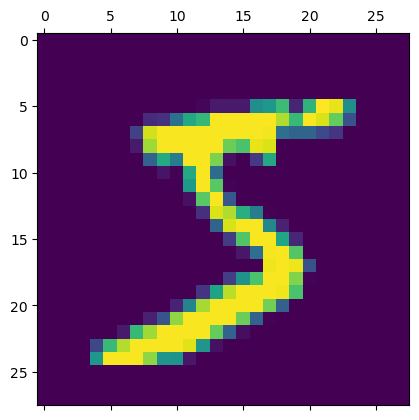

In [9]:
plt.matshow(X_train[0])

In [16]:
y_train[0]

5

In [10]:
#Normalization
X_train = X_train / 255
X_test = X_test / 255

In [13]:
#Flatten
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

## Using ANN

In [17]:
ANN = models.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ANN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ANN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 133s 70ms/step - loss: 0.1807 - accuracy: 0.9448
Epoch 2/5
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0873 - accuracy: 0.9734
Epoch 3/5
1875/1875 [==============================] - 132s 71ms/step - loss: 0.0603 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0487 - accuracy: 0.9848
Epoch 5/5
1875/1875 [==============================] - 133s 71ms/step - loss: 0.0381 - accuracy: 0.9888


In [19]:
ANN = models.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(1000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ANN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ANN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2030 - accuracy: 0.9399
Epoch 2/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0977 - accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0717 - accuracy: 0.9785
Epoch 4/5
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0553 - accuracy: 0.9833
Epoch 5/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0476 - accuracy: 0.9862


313/313 [==============================] - 5s 16ms/step


Text(95.72222222222221, 0.5, 'Truth')

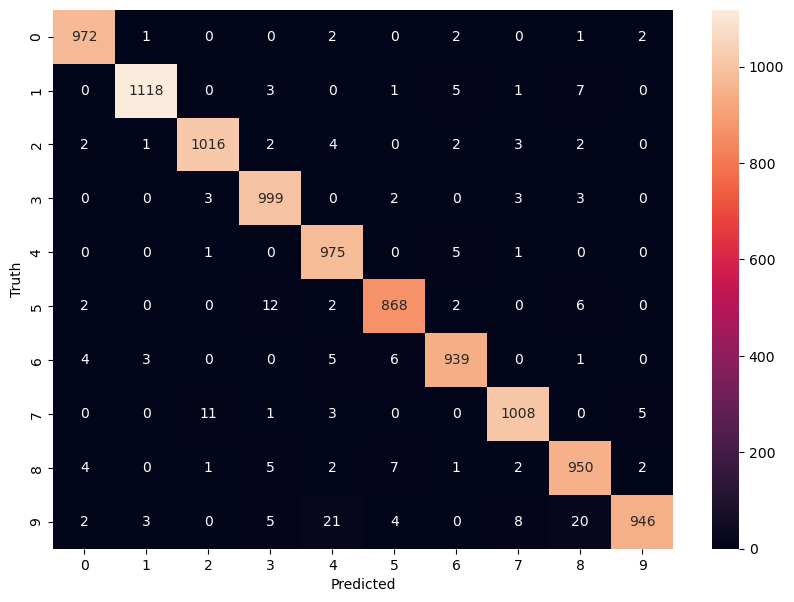

In [21]:
y_pred = ANN.predict(X_test)
y_predicted_labels = [np.argmax(element) for element in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using CNN


In [24]:
CNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
CNN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 61s 31ms/step - loss: 0.1463 - accuracy: 0.9548
Epoch 2/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0460 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0326 - accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0184 - accuracy: 0.9938


313/313 [==============================] - 4s 12ms/step


Text(95.72222222222221, 0.5, 'Truth')

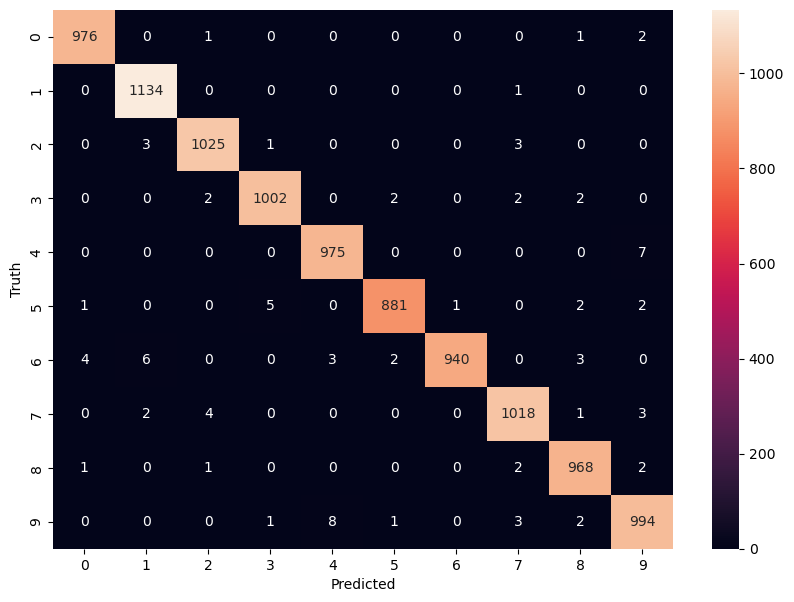

In [26]:
y_pred = CNN.predict(X_test)
y_predicted_labels = [np.argmax(element) for element in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')